## Solutions to problem_2 of Assignment_1
Importing of library required for problem 2

In [1]:
import numpy as np
import pandas as pd
# for graph to be plotted on Notebook
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
# displaying maximum of 5 rows
pd.set_option('display.max_rows', 10)

Loading the dataset.
`pd.readcsv()` reads csv data into dataframe. <br>
`train_data` stores the trained data with label <br>
`test_data` stores the test data with label

In [2]:
train_data = pd.read_csv('P2_data/P2_train.csv', header = None)
test_data = pd.read_csv('P2_data/P2_test.csv', header = None)
train_data

,0,1,2
0,0.445235,-2.083006,1
1,1.871452,-0.626011,1
2,-2.972692,0.025545,0
3,0.861221,-1.170108,1
4,-2.098894,-1.705435,0
...,...,...,...
305,0.693420,-1.630972,1
306,-2.639023,2.362222,0
307,0.065896,-1.185387,1
308,0.565275,-2.039740,1


In [3]:
test_data

,0,1,2
0,-2.699609,3.734804,0
1,-3.402778,-1.854617,0
2,-0.101088,-2.074187,1
3,-2.708434,-1.850341,0
4,-2.479960,-2.492819,0
...,...,...,...
85,-3.043020,-0.738789,0
86,-2.352522,-11.333922,0
87,0.268584,-2.065760,1
88,-2.580580,-1.183561,0


`index_0` and `index_1` are the lists to store the indices of data whose label is 0 and 1 respectively.

In [4]:
index_0 = []
index_1 = []
for i in range(len(train_data)):
    if train_data[2][i] == 0:
        index_0.append(i)
    else:
        index_1.append(i)

`prob_0` and `prob_1` are prior probabilities of occurence of label `0` and label `1` respectively. <br>
`train_0` and `train_1` are data corresponding to label_0 and label_1. <br>
And `train_label` stores the labels corresponding to their indices.

In [5]:
prob_0 = len(index_0)/len(train_data)
prob_1 = 1 - prob_0
train_0 = train_data.iloc[index_0,0:2]
train_1 = train_data.iloc[index_1,0:2]
train_label = train_data[2]
train_label

0      1
1      1
2      0
3      1
4      0
      ..
305    1
306    0
307    1
308    1
309    0
Name: 2, Length: 310, dtype: int64

`mean_0` and `mean_1` are means of data corresponding to labels 0 and 1 respectively. <br>
`covariance_0` and `covariance_1` are covariance corresponding to labels 0 and 1 respectively.

In [6]:
mean_0 = train_0.mean()
mean_0

0   -2.486466
1    0.237015
dtype: float64

In [7]:
mean_1 = train_1.mean()
mean_1

0    1.056773
1   -1.252551
dtype: float64

In [8]:
covariance_0 = train_0.cov()
covariance_0

,0,1
0,0.108311,0.107581
1,0.107581,7.096614


In [9]:
covariance_1 = train_1.cov()
covariance_1

,0,1
0,1.044242,0.582464
1,0.582464,1.288759


`test` stores the first two columns of Dataframe except labels. <br>
And `test_label` stores corresponding labels.

In [10]:
test = test_data.iloc[:,0:2]
test_label =test_data[2]
test

,0,1
0,-2.699609,3.734804
1,-3.402778,-1.854617
2,-0.101088,-2.074187
3,-2.708434,-1.850341
4,-2.479960,-2.492819
...,...,...
85,-3.043020,-0.738789
86,-2.352522,-11.333922
87,0.268584,-2.065760
88,-2.580580,-1.183561


In [11]:
test_label

0     0
1     0
2     1
3     0
4     0
     ..
85    0
86    0
87    1
88    0
89    0
Name: 2, Length: 90, dtype: int64

Now importing `multivariate_normal library` from `scipy.stats` and defining posterior probabilities of test_data except denominator factor. <br>
`y0` and `y1` are arrays of multivariate_normals with mean as `mean_0` and `mean_1` and covariance as `covariance_0` and `covariance_1` multiplied by their prior probabilities. <br> 
Size of tthe array y0 and y1 are 90 corrsponding to 90 test data.

In [12]:
from scipy.stats import multivariate_normal
y0 = multivariate_normal.pdf(test,mean=mean_0,cov=covariance_0)*prob_0
y1 = multivariate_normal.pdf(test,mean=mean_1,cov=covariance_1)*prob_1

`list_predicted` list stores the predicted labels by applying if probability of 0's occurence is greater or probability of occurence of 1's is greater.

In [13]:
list_predicted= []
for i in range(len(y1)):
    if y0[i] > y1[i]:
        list_predicted.append(0)
    else:
        list_predicted.append(1)

`correct_prediction` represents the number of data which are correctly predicted.
Here I've made use of test_label which was storing true labels corresponding to each of the data.

In [14]:
correct_prediction = 0
for i in range(len(test_data)):
    if(test_label[i] == list_predicted[i]):
        correct_prediction += 1
correct_prediction

90

As we can see out of 90 test data, all are correctly predicted. Now, finding the confusion matrix,

In [15]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_data[2],list_predicted)
conf_mat

array([[50,  0],
       [ 0, 40]])

Now finding the misclassification error.As we see misclassification_error is 0% i.e. Accuracy is 100%.

In [16]:
misclassification_error = (conf_mat[0][1]+conf_mat[1][0])/(conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1])
misclassification_error

0.0

## Part(a)
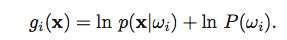 
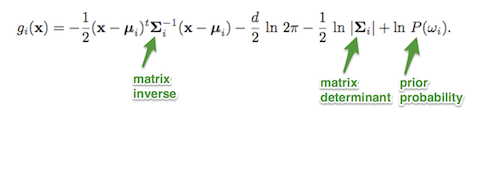

Function for plot the discriminant function and iso-probability contours

In [17]:
def contour(sigma1, sigma2):
    D = 2

    M1 = np.array([0.0, 0.0])
    M2 = np.array([1.0, 1.0])

    X, Y = np.mgrid[-2:2:100j, -2:2:100j]   # returns a dense multi-dimensional “meshgrid”
    points = np.c_[X.ravel(), Y.ravel()]

    inv_of_sigma1 = np.linalg.inv(sigma1)
    v = points - M1
    g1 = -0.5*np.sum(np.dot(v, inv_of_sigma1) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(sigma1))
    g1.shape = 100, 100

    inv_of_sigma2 = np.linalg.inv(sigma2)
    v = points - M2
    g2 = -0.5*np.sum(np.dot(v, inv_of_sigma2) * v, axis=1) - D*0.5*np.log(2*np.pi) - 0.5*np.log(np.linalg.det(sigma2))
    g2.shape = 100, 100

    fig, axes = pl.subplots(1, 2, figsize=(10, 5))

    ax1, ax2 = axes.ravel()
    

    ax1.pcolormesh(X, Y, g1)
    ax2.pcolormesh(X, Y, g2)

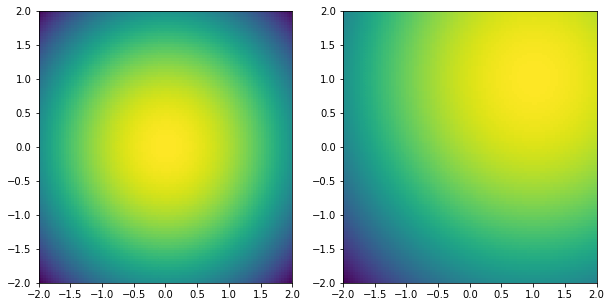

In [18]:
sigma1 = sigma2 = [[2, 0],[0, 2]]
contour(sigma1, sigma2)

## Part(b)

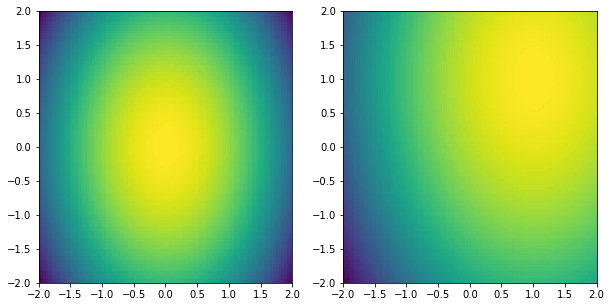

In [19]:
sigma1 = sigma2 = [[2 ,0], [0, 4]]
contour(sigma1, sigma2)

## Part(c)

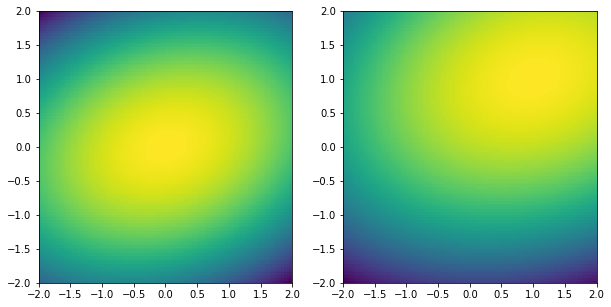

In [20]:
sigma1 = sigma2 = [[2.0, 0.2], [0.4, 1.0]]
contour(sigma1, sigma2)

## Part(d)

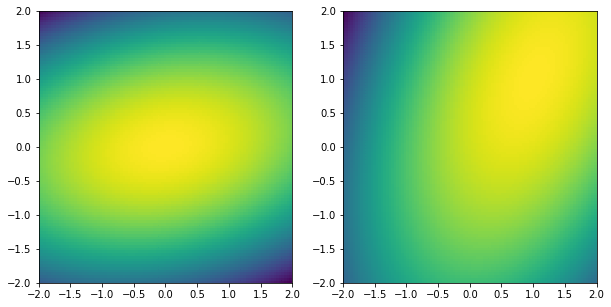

In [21]:
sigma1 = np.array([[3.0, 0.4], [0.3, 1.0]])
sigma2 = np.array([[1.0, 0.6], [0.7, 2.0]])
contour(sigma1, sigma2)